In [1]:
# import library
import pandas as pd
import utils
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics._plot import confusion_matrix


In [2]:
def load_corpus_xlsx(filename):
    corpus = pd.read_excel(filename, dtype={'msg': str})
    list_label = corpus['class'].to_list()
    list_content = corpus['msg'].to_list()

    return list_label, list_content

In [3]:
list_label, list_content = load_corpus_xlsx('../message_modified_v1.2.xlsx')
list_content = utils.entity_tagging(list_content)

In [4]:

def plot_confusion_matrix(confusion_matrix, classes):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = confusion_matrix.max() / 2
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], '.2f'),
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")


    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
def train_evaluation(list_label, list_content, vectorize_method, classifier_list):
    list_content_vec, list_label, list_len_sms, dictionary = utils.doc_2_vec(list_content, list_label, 'bow')
    for i in classifier_list:
        list_false_positive, list_false_negative, list_true_positive, list_true_negative = \
        utils.kfold_classification(list_content, list_content_vec, list_label, i, 5, vectorize_method)
        print('Evaluation for ' + i.upper())
        utils.evaluation(list_false_positive, list_false_negative, list_true_positive, list_true_negative)
        print('-------------------------------------------------')
    confusion_matrix_array = np.array([[sum(list_true_negative), sum(list_false_positive)],
                                   [sum(list_false_negative), sum(list_true_positive)]])
    # In confusion matrix
    plot_confusion_matrix(confusion_matrix_array, classes=['Negative', 'Positive'])
    # Hiển thị đồ thị
    plt.show()

In [6]:
def train_entire_dataset(list_content, list_label, vectorize_method):
    list_content_vec, list_label, list_len_sms, dictionary = utils.doc_2_vec(list_content, list_label, vectorize_method)
    clf = utils.build_classifier_nb(list_content_vec, list_label)
    pickle.dump(clf, open(r'C:\Users\MINH.NV193012\Desktop\20222\ProjectAI_Application\bow_nb_clf.pkl', 'wb'))
    print('Traning Done!')

In [7]:
train_entire_dataset(list_content, list_label,'bow')

Traning Done!


Evaluation for NB
False Positive Rate: 2.345400057465782%
False Negative Rate: 11.443693368713276%
True Positive Rate: 88.55630663128672%
True Negative Rate: 97.6545999425342%
-------------------------------------------------


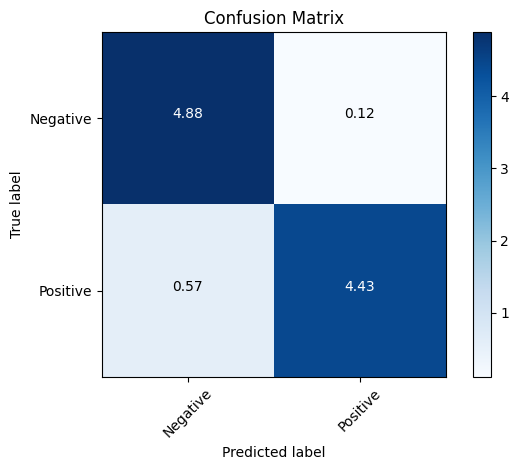

In [9]:
train_evaluation(list_label, list_content, 'bow', ['nb'])